In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

taux de reproduction 1.5151515151515151


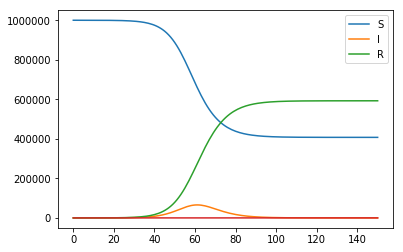

In [23]:
T=150
N=150
h=T/N
S0=1000000
I0=10
R0=0

y0=[S0,I0,R0]

r=0.5
a=0.33

print("taux de reproduction", r/a)

def sirlist(y,t,rSIR,aSIR):
    S,I,R=y
    ntotal = S + I + R 
    return (-rSIR*S*I/ntotal, rSIR*S*I/ntotal-aSIR*I,aSIR*I)

def sirarray(y,t,rSIR,aSIR):
    return np.array(sirlist(y,t,rSIR,aSIR))


trange=np.linspace(0,T,N+1,endpoint=True)

sir=sirlist

solution = odeint(sir,y0,trange,args=(r,a))

Ssol=solution[:,0]
Isol=solution[:,1]
Rsol=solution[:,2]

plt.figure(2)
plt.plot(trange,Ssol,trange,Isol,trange,Rsol,trange)
plt.legend(['S','I','R'])
plt.show()



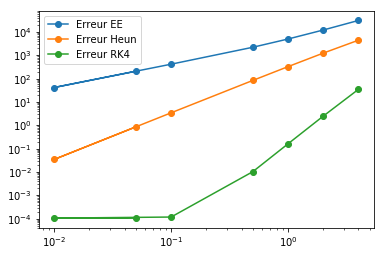

In [25]:
t1=52.0
T0=t1
t2=60.0
new_trange = [0.0,t1,t2]
beta=r
gamma=a

new_solution = odeint(sir, y0, new_trange, args=(beta,gamma),rtol=1.e-10)    #si x-y < x*rtol


Xinit=new_solution[1]
 
Xend=new_solution[2]
 
def ftxt(t,y):
    
    return sirarray(y,t,beta,gamma)
 
def phi_function_EE_scheme(Un,ftxt,h,tn):
    return ftxt(tn,Un)
 
def phi_function_Heun_scheme(Un,ftxt,h,tn):
    return 0.5*( ftxt(tn,Un) +ftxt(tn+h,Un + h*ftxt(tn,Un)) )
 
def phi_function_RK4_scheme(Un,ftxt,h,tn):
    K1 = ftxt(tn,Un)
    K2 = ftxt(tn+0.5*h,Un+0.5*h*K1) 
    K3 = ftxt(tn+0.5*h,Un+0.5*h*K2) 
    K4 = ftxt(tn+h,Un+h*K3) 
    return (K1+2*K2+2*K3+K4)/6.


 
error_list_RK4=[]
error_list_Heun=[]
error_list_EE=[]
hlist=[0.05, 0.01, 0.1, 0.5, 1., 2.,4.]
 
for h in hlist:
    current_N=np.int64((t2-t1)/h)
    assert current_N*h == t2-t1, "Probleme de h" #h doit etre divisible par t2-t1 ! t2-t1/h*h==t2-t1
    #use Xinit as initial values
    current_X_RK4=Xinit
    current_X_EE=Xinit    
    current_X_Heun=Xinit
    for jj in range(current_N):
        current_X_RK4=current_X_RK4+h*phi_function_RK4_scheme(current_X_RK4,ftxt,h, t1+jj*h)
        current_X_Heun=current_X_Heun+h*phi_function_Heun_scheme(current_X_Heun,ftxt,h, t1+jj*h)
        current_X_EE=current_X_EE+h*phi_function_EE_scheme(current_X_EE,ftxt,h, t1+jj*h)
    
    error_list_Heun.append(np.sum(np.abs(current_X_Heun-Xend))) 
 
    error_list_EE.append(np.sum(np.abs(current_X_EE-Xend))) 
    
    error_list_RK4.append(np.sum(np.abs(current_X_RK4-Xend))) 
 
    
plt.figure(3)
plt.loglog(hlist,error_list_EE,'o-',hlist,error_list_Heun,'o-',
           hlist,error_list_RK4,'o-',)
plt.legend(['Erreur EE','Erreur Heun','Erreur RK4'])

In [ ]:
# les politiques sanitaires ont pour but d'influencer r et a et S0
# par exemple : quarantaine a croit et r décroit, vaccination S0 décroit 